In [1]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_data=pd.read_csv(r"D:\Code\SQL\Bohubrihi\Assignment\Python\Stock_Market_Data.csv")
stock_data['Date']=pd.to_datetime(stock_data['Date'],dayfirst=True,utc=True)
stock_data.set_index('Date',inplace=True)
df=stock_data.copy()
df.head()

,Name,Open,High,Low,Close,Volume
Date,,,,,,
2022-01-02 00:00:00+00:00,01.Bank,22.83,23.20,22.59,22.93,1842350.41
2022-01-03 00:00:00+00:00,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2022-01-04 00:00:00+00:00,01.Bank,22.85,23.13,22.64,22.84,1354510.97
2022-01-05 00:00:00+00:00,01.Bank,22.91,23.20,22.70,22.98,1564334.81
2022-01-06 00:00:00+00:00,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [3]:
stock_data.shape

(49158, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49158 entries, 2022-01-02 00:00:00+00:00 to 2022-06-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    49158 non-null  object 
 1   Open    49158 non-null  float64
 2   High    49158 non-null  float64
 3   Low     49158 non-null  float64
 4   Close   49158 non-null  float64
 5   Volume  49158 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.6+ MB


## 1. Calculate basic summary statistics for each column (mean, median, standard deviation, etc.).


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
mean,157.869018,159.588214,155.906364,157.351462,5.619999e+05
std,520.191624,523.348078,517.136149,519.711667,1.276909e+06
min,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,89.400000,90.500000,87.700000,88.700000,5.401398e+05
max,6000.000000,6050.000000,5975.000000,6000.500000,6.593180e+07


## 2. Explore the distribution of the 'Close' prices over time.


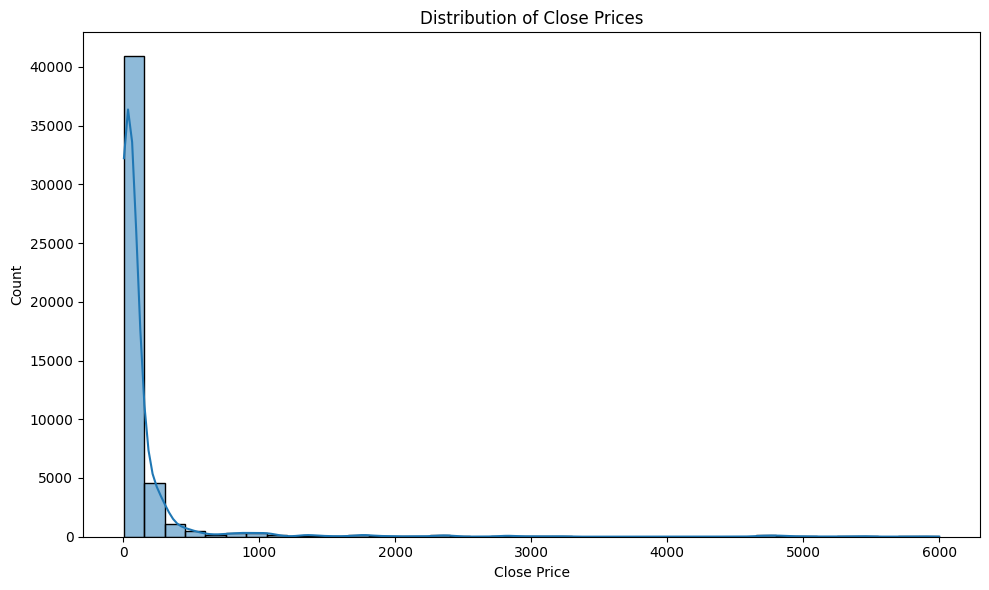

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=40)
#plt.xlim(0,3000)
plt.xlabel('Close Price')
plt.title('Distribution of Close Prices')
plt.tight_layout()
plt.show()


## 3. Identify and analyze any outliers (if any) in the dataset


In [7]:
# Identify and analyze any outliers in the 'Close' prices
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

print("\nOutliers in 'Close' prices:")
print(outliers)


Outliers in 'Close' prices:
                                       Name    Open    High     Low   Close  \
Date                                                                          
2022-01-02 00:00:00+00:00  06.Food_&_Allied  303.67  311.01  301.14  305.16   
2022-01-03 00:00:00+00:00  06.Food_&_Allied  309.80  312.41  300.36  303.13   
2022-01-04 00:00:00+00:00  06.Food_&_Allied  305.78  307.39  299.97  303.66   
2022-01-05 00:00:00+00:00  06.Food_&_Allied  305.40  308.92  301.87  303.43   
2022-01-06 00:00:00+00:00  06.Food_&_Allied  303.89  306.60  297.66  299.72   
...                                     ...     ...     ...     ...     ...   
2022-06-26 00:00:00+00:00          WATACHEM  204.50  211.60  204.50  207.90   
2022-06-27 00:00:00+00:00          WATACHEM  206.00  209.40  206.00  207.10   
2022-06-28 00:00:00+00:00          WATACHEM  208.90  210.10  205.00  205.80   
2022-06-29 00:00:00+00:00          WATACHEM  205.50  210.00  205.40  209.70   
2022-06-30 00:00:00+00:

# Part 2: Time Series Analysis / Rolling Window / Moving Averages :

## 1. Create a line chart to visualize the 'Close' prices over time.

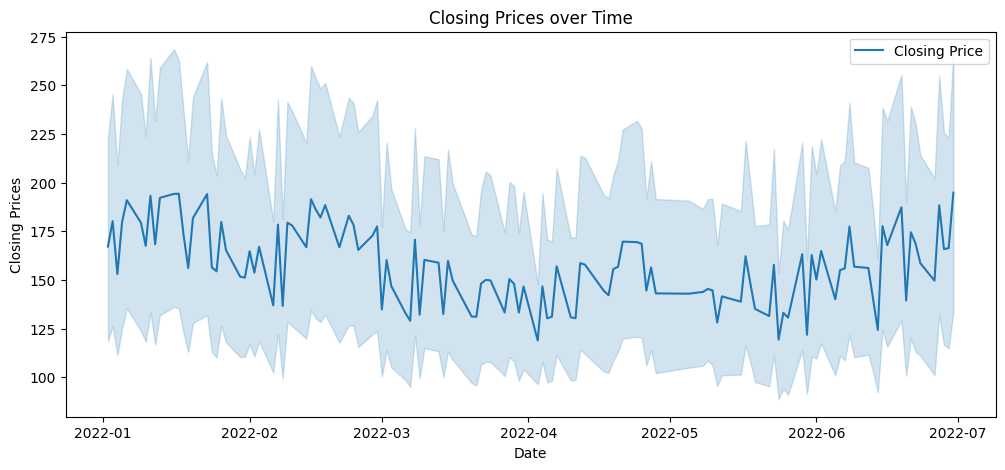

In [8]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x=df.index,y=df['Close'],label='Closing Price')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.title('Closing Prices over Time')
plt.legend()
plt.show()

## 2. Calculate and plot the daily percentage change in closing prices.


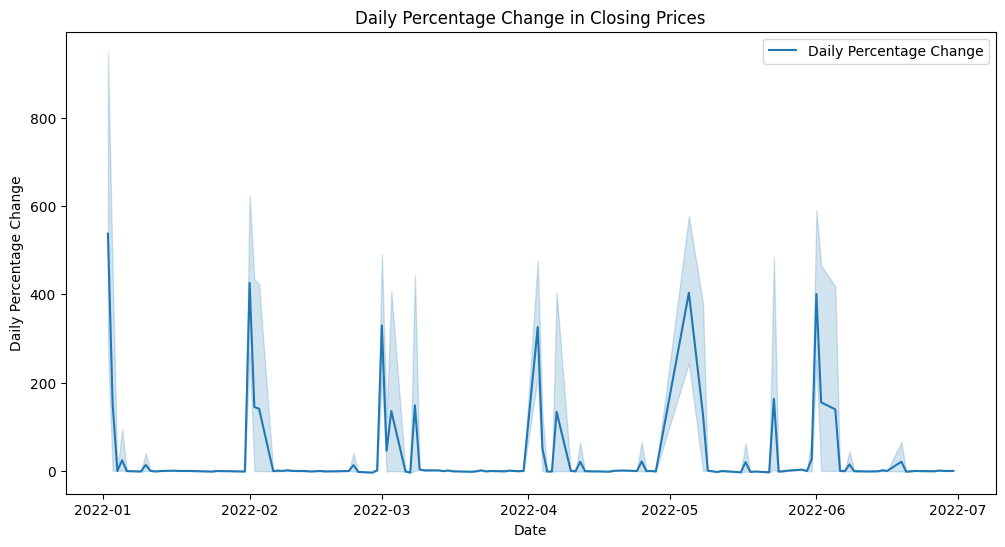

In [9]:
# Calculate and plot the daily percentage change in closing prices
df['Daily Change %'] = df['Close'].pct_change(fill_method=None) * 100
df=df.dropna()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x=df.index,y= df['Daily Change %'], label='Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.title('Daily Percentage Change in Closing Prices')
plt.legend()
plt.show()

In [10]:
df.head()

,Name,Open,High,Low,Close,Volume,Daily Change %
Date,,,,,,,
2022-01-03 00:00:00+00:00,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.130833
2022-01-04 00:00:00+00:00,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.262009
2022-01-05 00:00:00+00:00,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.612960
2022-01-06 00:00:00+00:00,01.Bank,23.12,23.65,23.00,23.37,2586344.19,1.697128
2022-01-09 00:00:00+00:00,01.Bank,23.47,23.62,22.98,23.14,1813583.91,-0.984168


## 3. Investigate the presence of any trends or seasonality in the stock prices.

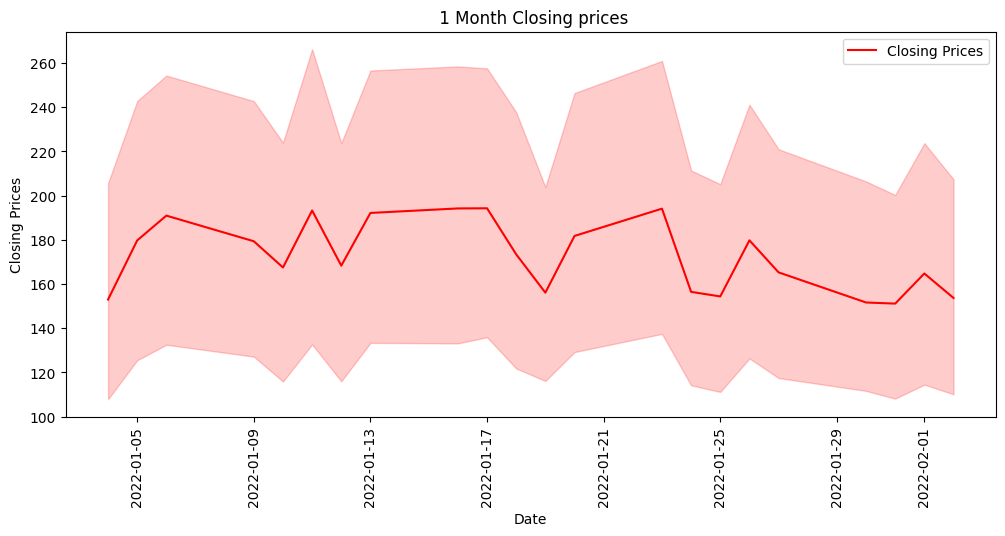

In [11]:
df1=df.loc[(df.index>"2022-01-03") & (df.index<"2022-02-03")][['Close']]
plt.figure(figsize=(12,5))
sns.lineplot(data=df1,x=df1.index,y=df1['Close'],label="Closing Prices", color="red")
plt.ylabel('Closing Prices')
plt.title(' 1 Month Closing prices')
plt.xticks(rotation=90)
plt.legend()
plt.show()

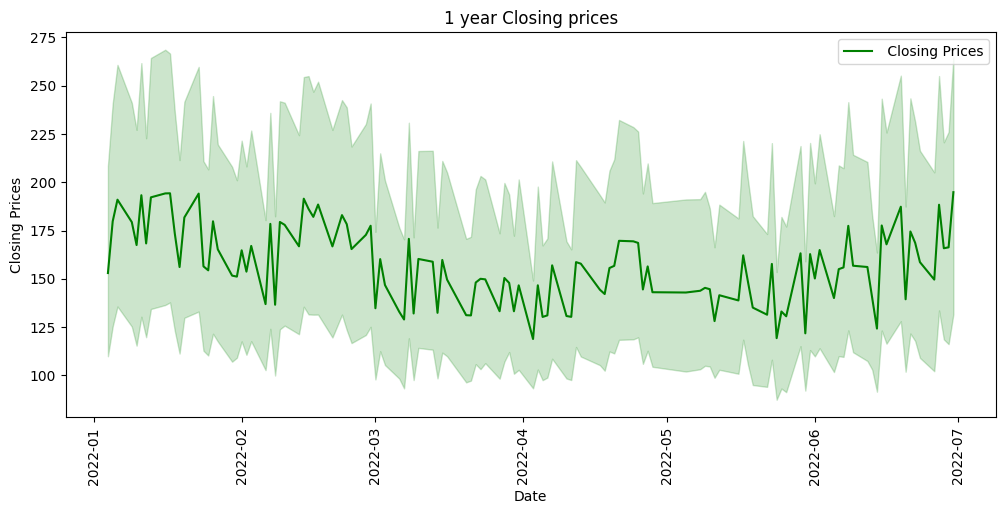

In [12]:
df1=df.loc[(df.index>"2022-01-03") & (df.index<"2023-01-02")][['Close']]
plt.figure(figsize=(12,5))
sns.lineplot(data=df1,x=df1.index,y=df1['Close'],label=" Closing Prices",color='green')
plt.ylabel('Closing Prices')
plt.title('1 year Closing prices')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## 4. Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.

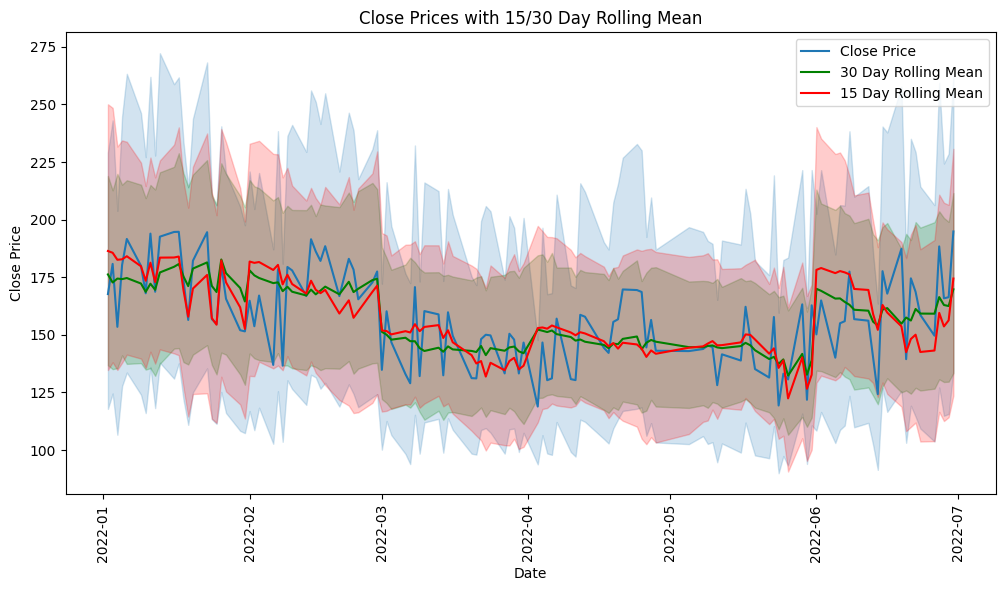

In [13]:
df['rolling_mean_30'] = df['Close'].rolling(window=30).mean()
df['rolling_mean_15']= df['Close'].rolling(window=15).mean()
df=df.dropna()
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Close', data=df, label='Close Price')
sns.lineplot(data=df, x=df.index, y=df['rolling_mean_30'], label='30 Day Rolling Mean', color='green')
sns.lineplot(data=df, x=df.index, y=df['rolling_mean_15'], label='15 Day Rolling Mean', color='red')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Close Price')
plt.title('Close Prices with 15/30 Day Rolling Mean')
plt.legend()
plt.show()

## 5. Calculate the average closing price for each stock

In [14]:
avg_closing_price=df.groupby('Name')['Close'].mean().reset_index()
avg_closing_price

,Name,Close
0,01.Bank,20.885400
1,02.Cement,96.055702
2,03.Ceramics_Sector,71.225164
3,04.Engineering,132.352459
4,05.Financial_Institutions,29.253525
...,...,...
407,WMSHIPYARD,12.370492
408,YPL,21.339344
409,ZAHEENSPIN,9.964754
410,ZAHINTEX,7.858197


## 6. Identify the top 5 and bottom 5 stocks based on average closing price.

In [15]:
# top 5 stock on average closing price
avg_closing_price.nlargest(5,['Close'])

,Name,Close
56,APSCLBOND,5413.238636
320,RECKITTBEN,5342.024793
298,PREBPBOND,4918.357143
178,IBBL2PBOND,4851.330357
283,PBLPBOND,4836.195652


In [16]:
# bottom 5 stock on average closing price
avg_closing_price.nsmallest(5,['Close'])

,Name,Close
144,FAMILYTEX,4.698361
187,ICBIBANK,4.725620
149,FBFIF,5.289344
293,POPULAR1MF,5.368033
291,PHPMF1,5.417213


# Part 3: Volatility Analysis:

## 1. Calculate and plot the rolling standard deviation of the 'Close' prices.


In [17]:
df2=stock_data.copy()
df2['Rolling Std Dev']=df2['Close'].rolling(window=30).std()
df2.dropna(inplace=True)
df2.head()

,Name,Open,High,Low,Close,Volume,Rolling Std Dev
Date,,,,,,,
2022-01-11 00:00:00+00:00,02.Cement,104.17,107.66,103.17,104.91,871453.57,36.648377
2022-01-12 00:00:00+00:00,02.Cement,105.20,106.51,103.50,104.37,597768.14,37.974412
2022-01-13 00:00:00+00:00,02.Cement,103.87,105.90,103.30,104.51,328102.29,39.066989
2022-01-16 00:00:00+00:00,02.Cement,105.47,106.71,104.33,105.37,389641.29,39.975721
2022-01-17 00:00:00+00:00,02.Cement,105.14,106.27,104.40,105.26,429906.71,40.671459


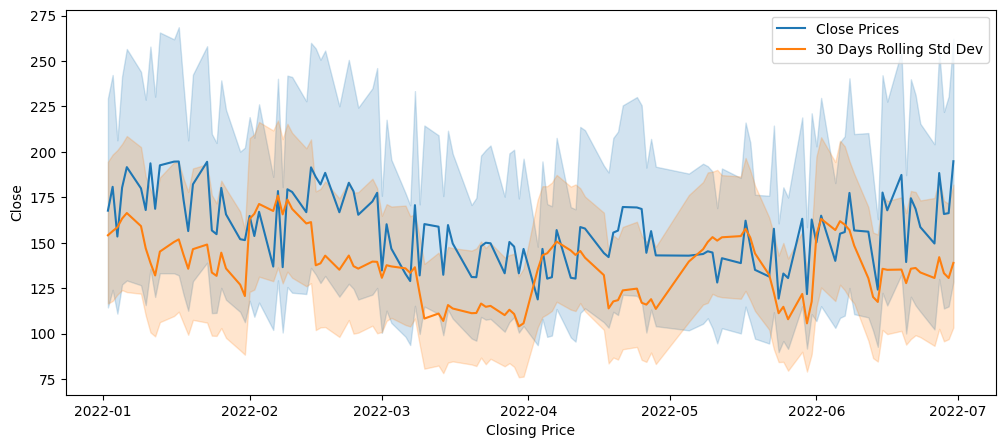

In [18]:
plt.figure(figsize=(12,5))
#plt.plot(df2.index,df2['Rolling Std Dev'])
sns.lineplot(data=df2,x=df2.index,y=df2['Close'], label='Close Prices')
sns.lineplot(data=df2,x=df2.index,y=df2['Rolling Std Dev'],label='30 Days Rolling Std Dev')
plt.xlabel("Closing Price")
plt.legend()
plt.show()       

## 2. Create a new column for daily price change (Close - Open).

In [19]:
df2['Daily Price Change']=df2['Close']-df2['Open']
df2.head()

,Name,Open,High,Low,Close,Volume,Rolling Std Dev,Daily Price Change
Date,,,,,,,,
2022-01-11 00:00:00+00:00,02.Cement,104.17,107.66,103.17,104.91,871453.57,36.648377,0.74
2022-01-12 00:00:00+00:00,02.Cement,105.20,106.51,103.50,104.37,597768.14,37.974412,-0.83
2022-01-13 00:00:00+00:00,02.Cement,103.87,105.90,103.30,104.51,328102.29,39.066989,0.64
2022-01-16 00:00:00+00:00,02.Cement,105.47,106.71,104.33,105.37,389641.29,39.975721,-0.10
2022-01-17 00:00:00+00:00,02.Cement,105.14,106.27,104.40,105.26,429906.71,40.671459,0.12


## 3. Analyze the distribution of daily price changes.

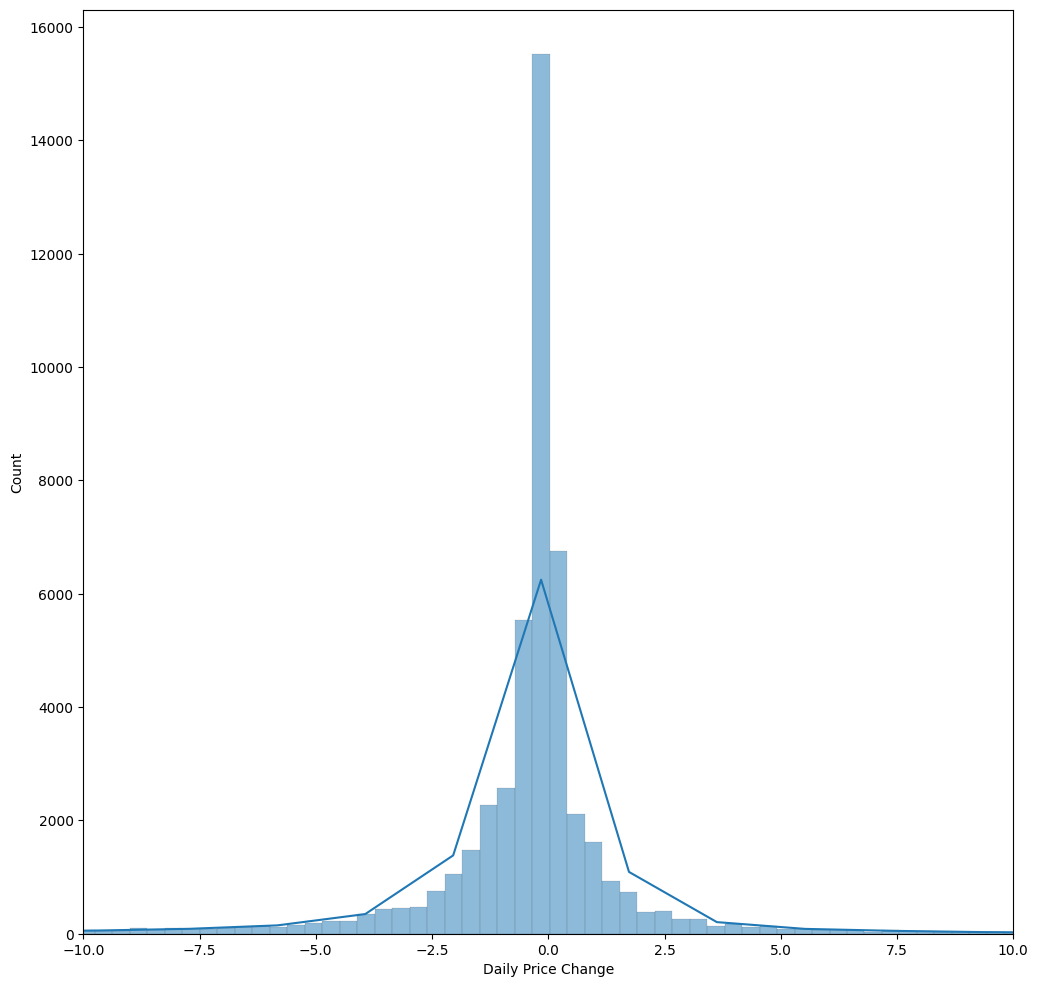

In [20]:
plt.figure(figsize=(12,12))
sns.histplot(df2['Daily Price Change'],kde=True,bins=1000)
plt.xlim(-10,10)
#plt.ylim(0,3000)
plt.show()

In [21]:
df2['Daily Price Change'].mode()

0    0.0
Name: Daily Price Change, dtype: float64

## 4. Identify days with the largest price increases and decreases.

In [22]:
largest_increases=df2.nlargest(1,'Daily Price Change')
largest_decreases=df2.nsmallest(1,'Daily Price Change')

In [23]:
print('The days with largest increases',largest_increases)
print('The days with largest decreases',largest_decreases)

The days with largest increases                                  Name    Open    High     Low   Close  Volume  \
Date                                                                            
2022-06-29 00:00:00+00:00  SJIBLPBOND  4710.0  4899.0  4710.0  4897.0   101.0   

                           Rolling Std Dev  Daily Price Change  
Date                                                            
2022-06-29 00:00:00+00:00      2184.394521               187.0  
The days with largest decreases                                  Name    Open    High     Low   Close  Volume  \
Date                                                                            
2022-03-07 00:00:00+00:00  RECKITTBEN  5753.0  5753.0  5550.0  5563.8  1876.0   

                           Rolling Std Dev  Daily Price Change  
Date                                                            
2022-03-07 00:00:00+00:00      2144.092378              -189.2  


## 5. Identify stocks with unusually high trading volume on certain days.

In [24]:
df3=stock_data.copy()

In [25]:

volume_stats = df3.groupby('Name')['Volume'].agg(['mean', 'std']).reset_index()
volume_stats.columns = ['Stock', 'Mean Volume', 'Std Volume']

# Merge volume stats back to the original dataframe
df3 = df3.merge(volume_stats, left_on='Name', right_on='Stock')

In [26]:
# Calculate threshold for unusually high trading volume (mean + 3 * std)
df3['Volume Threshold'] = df3['Mean Volume'] + 3* df3['Std Volume']

In [27]:
# Identify days with unusually high trading volume
unusual_volume_days = df3[df3['Volume'] > df3['Volume Threshold']]

In [28]:
# Display the days with unusually high trading volume
print("\nDays with Unusually High Trading Volume:")
print(unusual_volume_days[[ 'Name', 'Volume', 'Volume Threshold']])


Days with Unusually High Trading Volume:
                            Name      Volume  Volume Threshold
4                        01.Bank  2586344.19      2.490368e+06
21                       01.Bank  2844397.21      2.490368e+06
27                     02.Cement  1019975.29      9.688396e+05
95     05.Financial_Institutions  1818756.68      1.711888e+06
121             06.Food_&_Allied  1222831.55      1.136966e+06
...                          ...         ...               ...
48695                        UCB  1425490.00      1.176701e+06
48872                  USMANIAGL   290341.00      1.362599e+05
48881                  USMANIAGL   153722.00      1.362599e+05
48943                  VAMLBDMF1   696203.00      6.377175e+05
49113                 ZAHEENSPIN  1820824.00      1.751275e+06

[1084 rows x 3 columns]


# Part 4: Correlation and Heatmaps:

## 1. Explore the relationship between trading volume and volatility.


In [29]:
df4=stock_data.copy()
df4.head()

,Name,Open,High,Low,Close,Volume
Date,,,,,,
2022-01-02 00:00:00+00:00,01.Bank,22.83,23.20,22.59,22.93,1842350.41
2022-01-03 00:00:00+00:00,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2022-01-04 00:00:00+00:00,01.Bank,22.85,23.13,22.64,22.84,1354510.97
2022-01-05 00:00:00+00:00,01.Bank,22.91,23.20,22.70,22.98,1564334.81
2022-01-06 00:00:00+00:00,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [30]:
# Calculate daily returns
df4['Daily Return'] = df4['Close'].pct_change()

# Calculate rolling standard deviation (volatility) with a 30-day window
df4['Rolling Std Dev'] = df4['Daily Return'].rolling(window=30).std()

# Calculate the correlation between trading volume and volatility
correlation_volume_volatility = df4[['Volume', 'Rolling Std Dev']].corr()
print("\nCorrelation between Trading Volume and Volatility:")
print(correlation_volume_volatility)


Correlation between Trading Volume and Volatility:
                   Volume  Rolling Std Dev
Volume           1.000000        -0.036124
Rolling Std Dev -0.036124         1.000000


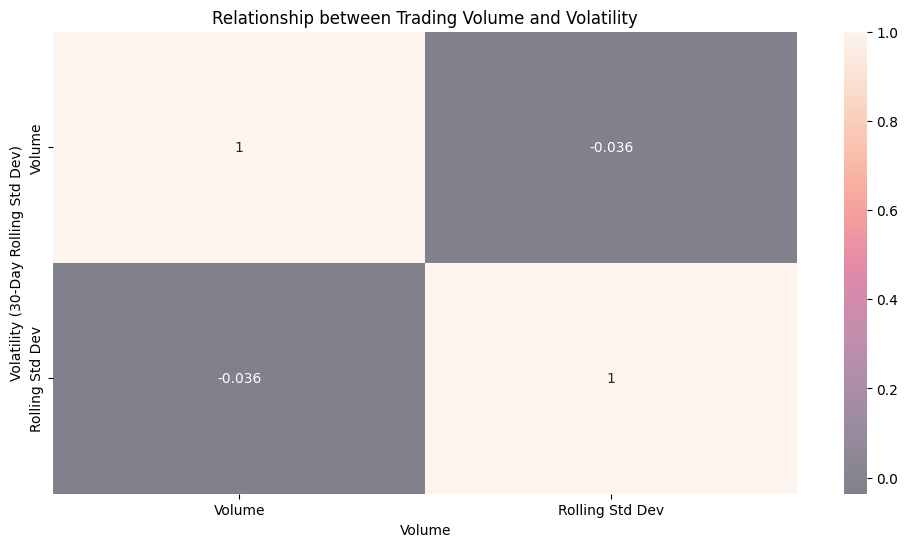

In [31]:
# Plot the relationship between trading volume and volatility
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_volume_volatility,annot=True, alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Volatility (30-Day Rolling Std Dev)')
plt.title('Relationship between Trading Volume and Volatility')
plt.show()

## 2. Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.

In [32]:
# Calculate the correlation matrix for 'Open' & 'High', prices
Open_High_correlation_matrix = df4[['Open', 'High']].corr()
print("\nCorrelation Matrix for 'Open', 'High' Prices:")
print(Open_High_correlation_matrix)



Correlation Matrix for 'Open', 'High' Prices:
         Open     High
Open  1.00000  0.99994
High  0.99994  1.00000


In [33]:
# Calculate the correlation matrix for 'Low' & 'Close', prices
Low_Close_correlation_matrix = df4[['Low', 'Close']].corr()
print("\nCorrelation Matrix for 'Low', 'Close' Prices:")
print(Low_Close_correlation_matrix)


Correlation Matrix for 'Low', 'Close' Prices:
            Low     Close
Low    1.000000  0.999961
Close  0.999961  1.000000


In [34]:
# Calculate the correlation matrix for 'Open' & 'High',"Low" &"Close", prices

price_correlation_matrix = df4[['Open','High','Low','Close']].corr()
print("\nCorrelation Matrix for 'Open', 'High','Low','Close' Prices:")
print(price_correlation_matrix)


Correlation Matrix for 'Open', 'High','Low','Close' Prices:
           Open      High       Low     Close
Open   1.000000  0.999940  0.999939  0.999925
High   0.999940  1.000000  0.999887  0.999942
Low    0.999939  0.999887  1.000000  0.999961
Close  0.999925  0.999942  0.999961  1.000000


## 3. Create a heatmap to visualize the correlations using the seaborn package.

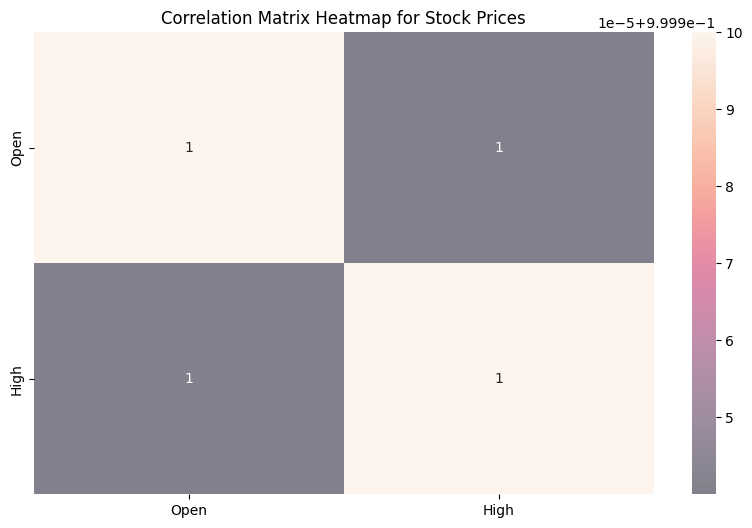

In [35]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(Open_High_correlation_matrix, annot=True,alpha=.5)
plt.title('Correlation Matrix Heatmap for Stock Prices')
plt.show()

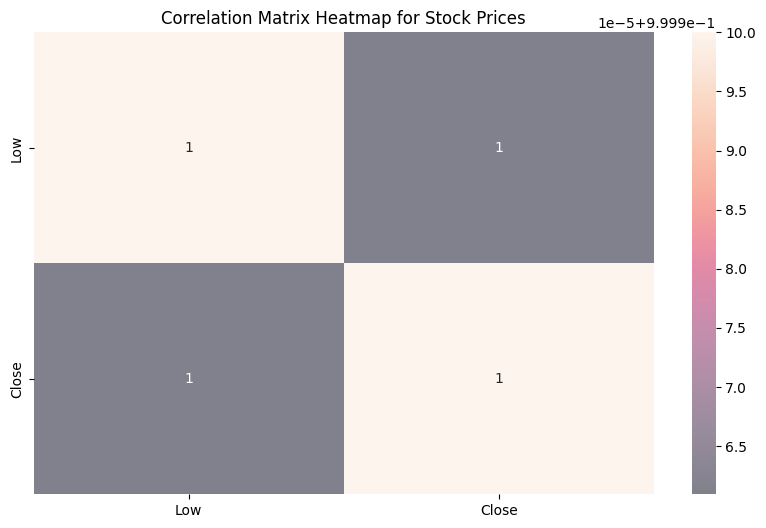

In [36]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(Low_Close_correlation_matrix, annot=True,alpha=.5)
plt.title('Correlation Matrix Heatmap for Stock Prices')
plt.show()

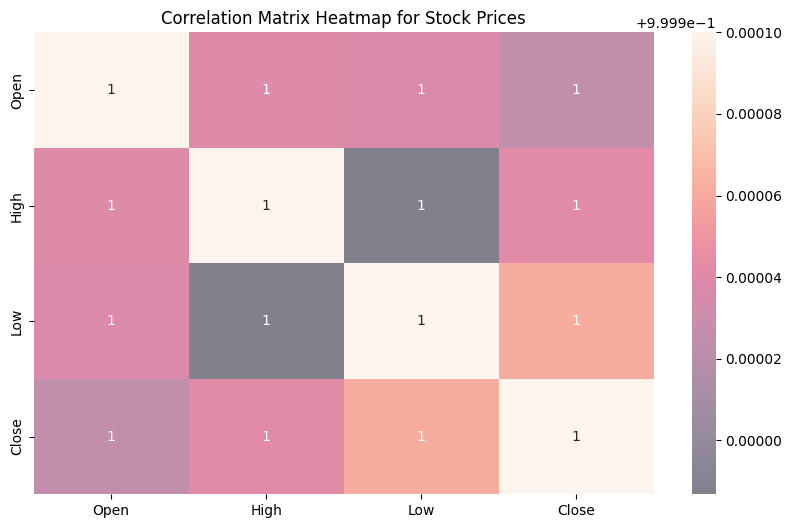

In [37]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(price_correlation_matrix, annot=True,alpha=.5)
plt.title('Correlation Matrix Heatmap for Stock Prices')
plt.show()

# Bonus Task

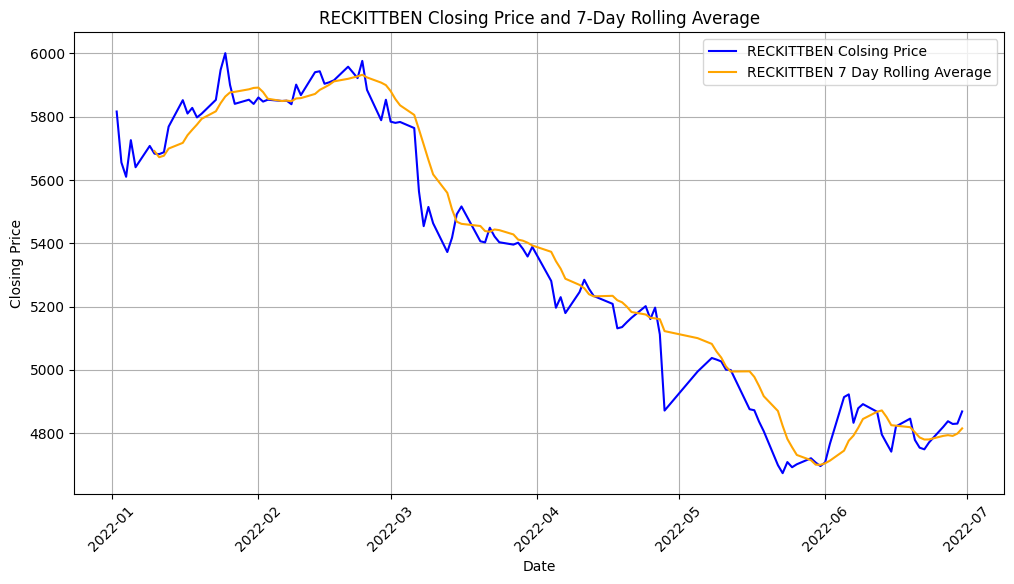

In [38]:
specific_company='RECKITTBEN'
specific_data=stock_data.loc[stock_data['Name']==specific_company].copy()
#specific_data['7_Day_Rolling_Avg']=specific_data['Close'].rolling(window=7).mean()
specific_data.loc[:,'7_Day_Rolling_Avg']=specific_data['Close'].rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(specific_data.index,specific_data['Close'],label=f"{specific_company} Colsing Price", color='blue')
plt.plot(specific_data.index,specific_data['7_Day_Rolling_Avg'],label=f"{specific_company} 7 Day Rolling Average",color='orange')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{specific_company} Closing Price and 7-Day Rolling Average')
plt.legend()  
plt.grid()
plt.xticks(rotation=45)
plt.show()